In [1]:
!tf_upgrade_v2

/home/salar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/salar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/salar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/salar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
import math
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import datetime
import xgboost
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import model_selection, metrics, preprocessing
from tqdm import tqdm

In [5]:
data = pd.read_csv("creditcard.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
data.shape

(284807, 31)

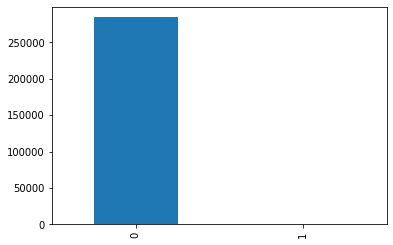

In [8]:
import matplotlib.pyplot as plt
import pylab
data['Class'].value_counts().plot(kind='bar')

plt.show()

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
import math
from sklearn.metrics import confusion_matrix


In [11]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state=42, stratify=y)

In [12]:
#create column for non-fraud transaction
data.loc[data.Class == 0 ,'normal'] = 1
data.loc[data.Class == 1 ,'normal'] = 0

In [13]:
#rename Class to fraud

data = data.rename(columns={'Class' : 'fraud' })

In [14]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [15]:
data = data.drop(['Time','Amount'],axis=1)

In [16]:
fraud = data[data.fraud==1]
normal = data[data.normal==1]

In [17]:
fraud.shape

(492, 31)

In [18]:
normal.shape

(284315, 31)

In [19]:
from sklearn.utils import resample
normal= resample(normal, 
                                 replace=False,    # sample without replacement
                                 n_samples=492,     # to match minority class
                                 random_state=123) # reproducible results

In [20]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,fraud,normal,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,1.0,-0.073403


In [21]:
#test and training data before undersampling

# Set X_train equal to 80% of the fraudulent transactions.
X_train = fraud.sample(frac=0.8)


count_Frauds = len(X_train)

# Add 80% of the normal transactions to X_train.
X_train = pd.concat([X_train, normal.sample(frac = 0.8)], axis = 0)

# X_test contains all the transaction not in X_train.
X_test = data.loc[~data.index.isin(X_train.index)]

In [22]:
from sklearn.utils import shuffle
#Shuffle the dataframes so that the training is done in a random order.
X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [23]:
#Add our target features to y_train and y_test.
y_train = X_train.fraud
y_train = pd.concat([y_train, X_train.normal], axis=1)

y_test = X_test.fraud
y_test = pd.concat([y_test, X_test.normal], axis=1)

In [24]:
#Drop target features from X_train and X_test.
X_train = X_train.drop(['fraud','normal'], axis = 1)
X_test = X_test.drop(['fraud','normal'], axis = 1)

In [25]:
X_train.shape

(788, 29)

In [199]:
# Split the testing data into validation and testing sets
#split = int(len(y_test)/2)


#X_input_valid = X_test.as_matrix()[:split]
#Y_input_valid = y_test.as_matrix()[:split]

#X_input_test = X_test.as_matrix()[split:]
#y_input_test = y_test.as_matrix()[split:]

In [26]:
x_input_train = X_train.values
y_input_train = y_train.values

x_input_test = X_test.values
y_input_test =y_test.values



In [27]:
X_train.shape

(788, 29)

In [28]:
X_test.shape

(284019, 29)

In [29]:
y_train.shape

(788, 2)

In [30]:
y_test.shape

(284019, 2)

In [31]:
#Define parameters for the model

learning_rate = 0.01
batch_size = 100




In [33]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [34]:
#create placehoder for features and labels

X = tf.placeholder(tf.float32,[None,29],name ='X_placehohder')
Y = tf.placeholder(tf.float32,[None,2],name ='y_placehohder')

In [35]:
num_classes = 2
num_features = 29

In [37]:
#inputs : placehoders, from inputs
#hidden1 :size of the first hidden layer
#hidden2 : size of the second hidden layer
# ...fun
feature_num = 29
hidden1_unit =10
hidden2_unit =10
hidden3_unit =10
#hidden4_unit =10
hidden5_unit =10
weights1 = tf.Variable(tf.truncated_normal([29,hidden1_unit],stddev=1.0/math.sqrt(float(feature_num))),name = 'weights')
biases = tf.Variable(tf.zeros(hidden1_unit),name = 'biases')
hidden1 = tf.nn.sigmoid(tf.matmul(X,weights1)+biases)
hidden1 = tf.nn.dropout(hidden1, rate =0.5)
        
weights2 = tf.Variable(tf.truncated_normal([hidden1_unit,hidden2_unit],stddev=1.0/math.sqrt(float(hidden1_unit))),name = 'weights')
biases = tf.Variable(tf.zeros(hidden2_unit),name = 'biases')
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1,weights2)+biases)  
hidden2 = tf.nn.dropout(hidden2, rate =0.5)        
        

weights3 = tf.Variable(tf.truncated_normal([hidden2_unit,hidden3_unit],stddev=1.0/math.sqrt(float(hidden2_unit))),name = 'weights')
biases3 = tf.Variable(tf.zeros(hidden3_unit),name = 'biases')
hidden3 = tf.nn.sigmoid(tf.matmul(hidden2,weights3)+biases3) 
hidden3 = tf.nn.dropout(hidden3,rate = 0.5)
        
        
        
#linear

weights5 = tf.Variable(tf.truncated_normal([hidden3_unit,num_classes],stddev=0.1/math.sqrt(float(hidden5_unit))),name = 'weights')
biases5 = tf.Variable(tf.zeros([num_classes]),name = 'biases')
logits = tf.nn.softmax(tf.matmul(hidden3,weights5) + biases5)
        


#labels = tf.to_int32(Y)

#reg = tf.nn.l2_loss(weights1) + tf.nn.l2_loss(weights2) + tf.nn.l2_loss(weights3) + tf.nn.l2_loss(weights5)
#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels =  Y , logits = logits, name = 'xentropy'))
#loss = tf.reduce_mean(loss + reg * 0.01)

loss = tf.cast((tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y)) +
    0.01*tf.nn.l2_loss(weights1) +
    0.01*tf.nn.l2_loss(biases) +
    0.01*tf.nn.l2_loss(weights5) +
    0.01*tf.nn.l2_loss(biases5)) ,tf.float32)     


optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
        
correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
#compute accuracy 
accuracy = tf.reduce_mean (tf.cast(correct_prediction,tf.float32))

        
    
    

In [38]:
import numpy as np

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [39]:
#correct_prediction = tf.equal(tf.arg_max(logits,1),tf.arg_max(Y,1))
train_predictions = tf.nn.softmax(logits)

In [40]:
import datetime
sess = tf.InteractiveSession()
tf.summary.scalar('accuracy', accuracy)
time_string = datetime.datetime.now().isoformat()
#experiment_name = f"one_hidden_layer_1000_steps_{time_string}"

merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter(f'./train', sess.graph)
test_writer  = tf.summary.FileWriter(f'./test', sess.graph)

tf.global_variables_initializer().run()



# Create a Tensorflow session

print('Initialized')
a =[]
b=[]
c=[]
d = []
for step in range(2000):
    # Deffine an offset
    offset = (step * batch_size) % (y_input_train.shape[0] - batch_size)
    # Create batch data and labels
    batch_data = x_input_train[offset:(offset + batch_size)]
    batch_labels = y_input_train[offset:(offset + batch_size)]
    
    
    batch_x, batch_y = batch_data , batch_labels
    sess.run(optimizer, feed_dict={X : batch_x, Y : batch_y})
    sess.run(accuracy,feed_dict= {X: x_input_test,Y: y_input_test})

    if step % 50 == 0:
        train = sess.run(accuracy,feed_dict= {X : batch_x, Y : batch_y})
        test = sess.run(accuracy,feed_dict= {X: x_input_test,Y: y_input_test})
        l_train = sess.run(loss,feed_dict= {X : batch_x, Y : batch_y})
        l_test = sess.run(loss,feed_dict= {X : x_input_test, Y : y_input_test})
        
        
        
        a.append(train)
        b.append(test)
        c.append(l_train)
        d.append(l_test)
        
        print(f'step: {step}')
        print('model training accuracy:')
        print(sess.run(accuracy,feed_dict= {X : batch_x, Y : batch_y}))
        print('model test accuracy:')
        print(sess.run(accuracy,feed_dict= {X: x_input_test,Y: y_input_test}))
        #print(sess.run(roc_score, feed_dict={x : x_input_test, y : y_input_test}))

        
print("final model accuracy:")
print(sess.run(accuracy,feed_dict= {X: x_input_test,Y: y_input_test}))




Initialized
step: 0
model training accuracy:
0.54
model test accuracy:
0.00066544843
step: 50
model training accuracy:
0.68
model test accuracy:
0.6558681
step: 100
model training accuracy:
0.89
model test accuracy:
0.9016545
step: 150
model training accuracy:
0.89
model test accuracy:
0.9269098
step: 200
model training accuracy:
0.92
model test accuracy:
0.9298709
step: 250
model training accuracy:
0.86
model test accuracy:
0.9496724
step: 300
model training accuracy:
0.84
model test accuracy:
0.95926327
step: 350
model training accuracy:
0.91
model test accuracy:
0.9536686
step: 400
model training accuracy:
0.9
model test accuracy:
0.96593183
step: 450
model training accuracy:
0.9
model test accuracy:
0.9564254
step: 500
model training accuracy:
0.93
model test accuracy:
0.9625694
step: 550
model training accuracy:
0.9
model test accuracy:
0.9651115
step: 600
model training accuracy:
0.95
model test accuracy:
0.96785074
step: 650
model training accuracy:
0.91
model test accuracy:
0.9

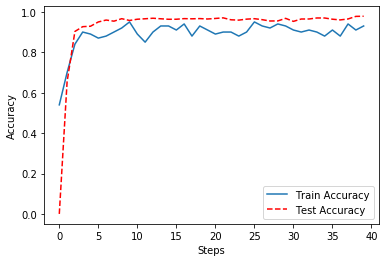

In [41]:
plt.plot(a, label='Train Accuracy')
plt.plot(b,linestyle='--', color='r', label='Test Accuracy')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

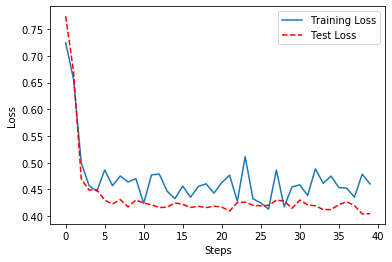

In [42]:
plt.plot(c, label='Training Loss')
plt.plot(d,linestyle='--', color='r', label='Test Loss')

plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
c

[0.72431356,
 0.6570121,
 0.49949554,
 0.45706707,
 0.44665688,
 0.48637953,
 0.45703164,
 0.47511426,
 0.46378183,
 0.4701607,
 0.4240429,
 0.47728333,
 0.4786863,
 0.44671807,
 0.43275723,
 0.45620513,
 0.43549764,
 0.455668,
 0.46047035,
 0.44301924,
 0.46274993,
 0.47672817,
 0.42782006,
 0.5114,
 0.43260637,
 0.42466182,
 0.4130951,
 0.4862421,
 0.41760132,
 0.45469046,
 0.45864034,
 0.43868595,
 0.488461,
 0.46131015,
 0.47494555,
 0.45356366,
 0.4525103,
 0.43554568,
 0.4787267,
 0.4602356]

In [44]:
import xgboost

In [47]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normAmount'],
      dtype='object')

In [48]:
y_train = y_train.drop(['normal'],axis = 1)
y_test = y_test.drop(['normal'],axis = 1)

In [65]:
xgb_clf= xgboost.XGBClassifier()
xgb_clf.fit(X_train,y_train.values.ravel())
y_pred = xgb_clf.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[274456,   9465],
       [    13,     85]])

In [67]:
precision_score(y_test,y_pred)

0.008900523560209424

In [68]:
recall_score(y_test,y_pred)

0.8673469387755102

In [69]:
from sklearn.metrics import roc_curve

In [70]:
fpr,tpr, thresholds = roc_curve(y_test,y_pred)

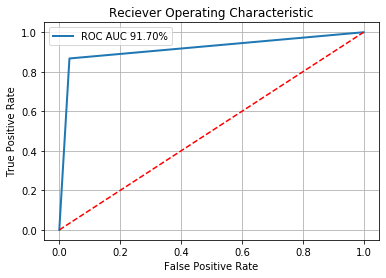

In [71]:
def plot_roc_curve(fpr,tpr,label = None):
    fig, ax = plt.subplots()
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr,tpr, linewidth =2,label = f"ROC AUC {roc_auc:.2%}")
    plt.plot([0, 1], [0, 1], color="r", linestyle="--")
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Reciever Operating Characteristic")
    ax.grid()
plot_roc_curve(fpr,tpr)
plt.show()

In [73]:
y_prob_xgb = xgb_clf.predict_proba(X_test)
y_prob_xgb_pisitive = y_prob_xgb[:, 1]

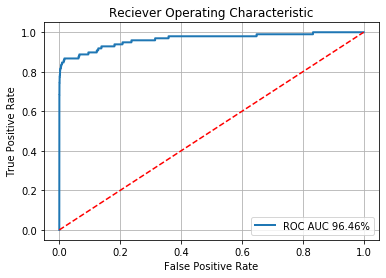

In [74]:
fpr,tpr, thresholds = roc_curve(y_test,y_prob_xgb_pisitive)
def plot_roc_curve(fpr,tpr,label = None):
    fig, ax = plt.subplots()
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr,tpr, linewidth =2,label = f"ROC AUC {roc_auc:.2%}")
    plt.plot([0, 1], [0, 1], color="r", linestyle="--")
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Reciever Operating Characteristic")
    ax.grid()
plot_roc_curve(fpr,tpr)
plt.show()